In [15]:
import numpy as np

data = np.load('data.npy')
target = np.load('target.npy')

#Menyimpan Numpy Array dari source code sebelumnya

In [16]:
from keras.models import Sequential 
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Conv2D(200,(3,3), input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#CNN Layer Pertama menggunakan activasi relu dan maxpooling layer

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#CNN Layer Kedua

model.add(Flatten())
model.add(Dropout(0.5))
#Layer Flatten
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#Final layer menggunakan 2 output kategori

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target = train_test_split(data,target,test_size=0.1)

In [18]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
31/31 [==============================] - 43s 1s/step - loss: 0.7078 - accuracy: 0.5242 - val_loss: 0.6710 - val_accuracy: 0.6734
Epoch 2/20
31/31 [==============================] - 43s 1s/step - loss: 0.5660 - accuracy: 0.7000 - val_loss: 0.4700 - val_accuracy: 0.7500
Epoch 3/20
31/31 [==============================] - 40s 1s/step - loss: 0.3804 - accuracy: 0.8343 - val_loss: 0.3256 - val_accuracy: 0.8871
Epoch 4/20
31/31 [==============================] - 37s 1s/step - loss: 0.2447 - accuracy: 0.8970 - val_loss: 0.2262 - val_accuracy: 0.9032
Epoch 5/20
31/31 [==============================] - 42s 1s/step - loss: 0.2099 - accuracy: 0.9141 - val_loss: 0.1953 - val_accuracy: 0.9435
Epoch 6/20
31/31 [==============================] - 38s 1s/step - loss: 0.1470 - accuracy: 0.9424 - val_loss: 0.2445 - val_accuracy: 0.8992
Epoch 7/20
31/31 [==============================] - 44s 1s/step - loss: 0.1417 - accuracy: 0.9495 - val_loss: 0.2019 - val_accuracy: 0.9274
Epoch 8/20
31/31 [==

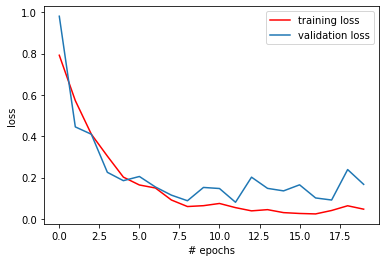

In [12]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'], 'r', label = 'training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

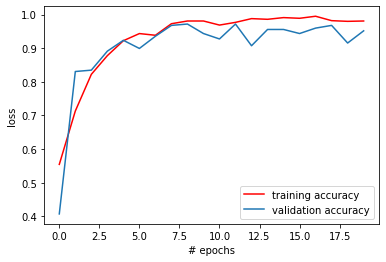

In [13]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [14]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 2s 301ms/step - loss: 0.3729 - accuracy: 0.9130
[0.37286511063575745, 0.9130434989929199]
